# Loan Delinquency Prediction model

### Loan delinquency refers to a situation where a borrower fails to make scheduled payments towards their loan obligations. This typically occurs when a borrower misses one or more payments and extends beyond the agreed-upon due date. A loan becomes delinquent when the borrower is unable to make the payment within a specified grace period.

# About Dataset

XYZ Corporation is currently experiencing a period of adversity. Their Non-Performing Assets (NPAs) have seen a notable increase in recent times, with a significant portion stemming from loans extended to individual borrowers. To address this pressing issue, the bank's Chief Risk Officer has taken the initiative to establish a data-driven framework for the approval of loans to individual borrowers, with the aim of mitigating the risk of these loans transitioning into NPAs.

Link: https://www.kaggle.com/datasets/wajidsaleem/loan-delinquent


## Features

### ID:

Customer ID


### Delinquent : 

Indicates whether the customer is delinquent or not (1 => Yes, 0 => No)


### Term:

Loan term in months


### Gender:

The borrower's Gender (Male or Female).


### Purpose:

Borrower's purpose of taking the loan.


### Home_Ownership:

Home ownership status of the borrower


### Age:

Age of the borrower.


### FICO:

The Fico score of the customer (Credit score issued by the Bureau)


## How can these factors potentially affect the loan delinquency?

Loan term: The length of the loan term can affect a borrower's ability to repay the loan. Longer loan terms may result in higher chances of delinquency, as borrowers have more time to encounter financial difficulties.

Gender: While gender should not be a factor in determining loan delinquency, some studies have shown that there may be statistically significant differences in delinquency rates between genders. However, it's important to note that these differences may be influenced by other factors like income, employment stability, or loan amount.

Purpose of loan: The purpose for which the borrower is taking the loan can have an impact on delinquency. For example, loans taken for education or medical expenses may have lower delinquency rates compared to loans taken for high-risk ventures like starting a business.

Home ownership status: Home ownership status can be an indicator of stability and financial responsibility. Homeowners may have lower delinquency rates compared to renters, as they have an asset and are more likely to have stable income.

Age: Age can be a factor in delinquency, as younger borrowers may have less financial stability and experience compared to older borrowers. However, it's important to assess age in conjunction with other factors like employment stability, income, and credit history.

FICO score: FICO score is a widely used credit scoring system that assesses a borrower's creditworthiness. Lower FICO scores indicate higher risk, and borrowers with lower scores may have higher delinquency rates. FICO score is considered one of the most important factors in predicting loan delinquency.

These factors are not exhaustive, and other variables like income, employment stability, debt-to-income ratio, and previous delinquency history may also be important in predicting loan delinquency. It's important to analyze and assess multiple factors together to get a comprehensive understanding of a borrower's risk profile.

In [1]:
# Importing required Libraries

import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
sns.set_style('whitegrid')

In [2]:
# Loading the dataset

df = pd.read_csv('Loan Delinquent Dataset.csv')

In [3]:
# Columns present in the dataset

df.columns

Index(['ID', 'delinquent', 'Sdelinquent', 'term', 'gender', 'purpose',
       'home_ownership', 'age', 'FICO'],
      dtype='object')

In [4]:
df.head()

,ID,delinquent,Sdelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,Yes,1,36 months,Female,House,Mortgage,>25,300-500
1,2,No,0,36 months,Female,House,Rent,20-25,>500
2,3,Yes,1,36 months,Female,House,Rent,>25,300-500
3,4,Yes,1,36 months,Female,Car,Mortgage,>25,300-500
4,5,Yes,1,36 months,Female,House,Rent,>25,300-500


In [5]:
# Renaming the Column names:

df = df.rename(columns = {'ID':'Id', 'Sdelinquent':'Delinquent', 'term':'Loan_term', 'gender':'Gender', 'purpose':'Loan_purpose',
                     'home_ownership':'Home_ownership', 'age':'Age', 'FICO':'Fico_score'})

In [6]:
# Checking the first 10 rows

df.head(10)

,Id,delinquent,Delinquent,Loan_term,Gender,Loan_purpose,Home_ownership,Age,Fico_score
0,1,Yes,1,36 months,Female,House,Mortgage,>25,300-500
1,2,No,0,36 months,Female,House,Rent,20-25,>500
2,3,Yes,1,36 months,Female,House,Rent,>25,300-500
3,4,Yes,1,36 months,Female,Car,Mortgage,>25,300-500
4,5,Yes,1,36 months,Female,House,Rent,>25,300-500
5,6,Yes,1,36 months,Male,Car,Own,>25,>500
6,7,No,0,36 months,Female,House,Rent,>25,>500
7,8,No,0,36 months,Male,House,Mortgage,>25,>500
8,9,Yes,1,36 months,Male,House,Rent,>25,>500
9,10,Yes,1,36 months,Female,House,Rent,20-25,>500


In [7]:
# Since Delinquent is just same as delinquent in numeric form, dropping the column as shown:

df.drop('delinquent', axis=1, inplace=True)

In [8]:
# Checking the last 10 rows

df.tail(10)

,Id,Delinquent,Loan_term,Gender,Loan_purpose,Home_ownership,Age,Fico_score
11538,11539,0,36 months,Female,Other,Mortgage,>25,>500
11539,11540,0,60 months,Male,House,Rent,>25,>500
11540,11541,1,36 months,Female,House,Rent,>25,300-500
11541,11542,1,36 months,Female,Wedding,Rent,>25,300-500
11542,11543,1,36 months,Male,House,Mortgage,>25,>500
11543,11544,0,60 months,Male,other,Mortgage,>25,300-500
11544,11545,1,36 months,Male,House,Rent,20-25,300-500
11545,11546,0,36 months,Female,Personal,Mortgage,20-25,>500
11546,11547,1,36 months,Female,House,Rent,20-25,300-500
11547,11548,1,36 months,Male,Personal,Mortgage,20-25,300-500


In [9]:
# Checking the number of rows and columns.

print('Total number of observations/rows are:',df.shape[0])
print('Total number of features/columns are:',df.shape[1])

Total number of observations/rows are: 11548
Total number of features/columns are: 8


In [10]:
# Checking the basic info of the data.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              11548 non-null  int64 
 1   Delinquent      11548 non-null  int64 
 2   Loan_term       11548 non-null  object
 3   Gender          11548 non-null  object
 4   Loan_purpose    11548 non-null  object
 5   Home_ownership  11548 non-null  object
 6   Age             11548 non-null  object
 7   Fico_score      11548 non-null  object
dtypes: int64(2), object(6)
memory usage: 721.9+ KB


In [11]:
# Checking the data description of all the variables, which gives us the count, mean, std, minimum, 25th quartile, 
# median, 75th quartile and maximum values in the respective numerical columns.

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,11548.0,NaN,NaN,NaN,5774.5,3333.764789,1.0,2887.75,5774.5,8661.25,11548.0
Delinquent,11548.0,NaN,NaN,NaN,0.668601,0.470737,0.0,0.0,1.0,1.0,1.0
Loan_term,11548,2,36 months,10589,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11548,2,Male,6555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Loan_purpose,11548,7,House,6892,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Home_ownership,11548,3,Mortgage,5461,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,11548,2,20-25,5888,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fico_score,11548,2,300-500,6370,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It can be observed that:


There are more borrowers who have been delinquent on repaying loans compared to the ones paying on time

Majority of the borrowers opted for a loan term of 36 months i.e 2 years

Majority of the borrowers are male

Most of the loans are taken for the purpose of house

Majority of the borrowers hold a mortgage on their houses

Majority of the borrowers in this dataset belong to an age category of 20-25

Since most of the data in the dataset consists of borrowers with delinquency, the majority of FICO score is reflected to be low i.e 300-500

In [12]:
# Since Id does not impact the loan delinquency parameter, it is being dropped from the dataset.

df.drop('Id', axis=1, inplace=True)

In [13]:
# Before Starting the Exploratory Data Analysis, Seeing how the data values look like for all the observations:

for i in df.columns:
    print('*'*50, i, '*'*50)
    print('\n')
    print(set(df[i].to_list()))
    print('\n')

************************************************** Delinquent **************************************************


{0, 1}


************************************************** Loan_term **************************************************


{'60 months', '36 months'}


************************************************** Gender **************************************************


{'Female', 'Male'}


************************************************** Loan_purpose **************************************************


{'other', 'Wedding', 'Other', 'Car', 'Personal', 'House', 'Medical'}


************************************************** Home_ownership **************************************************


{'Own', 'Mortgage', 'Rent'}


************************************************** Age **************************************************


{'>25', '20-25'}


************************************************** Fico_score **************************************************


{'>500', '300-500'}




# Exploratory Data Analysis

## Univariate Analysis of the features

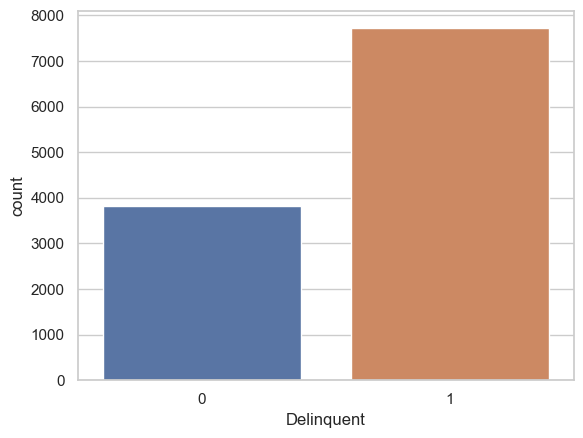

In [14]:
# Checking the feature Delinquent

sns.countplot(data=df, x = 'Delinquent')
plt.show()

In [15]:
df['Delinquent'].value_counts()

Delinquent
1    7721
0    3827
Name: count, dtype: int64

It is observed that majority of the observations are delinquent

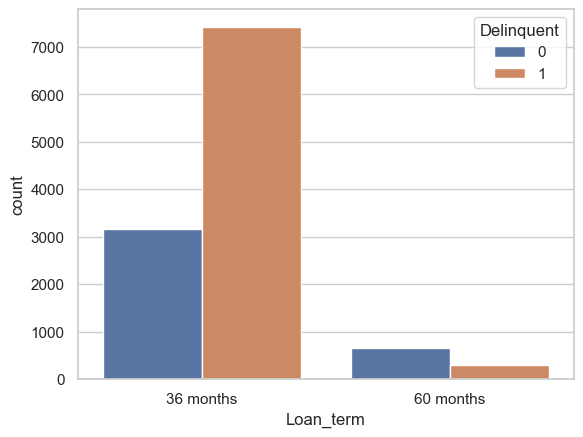

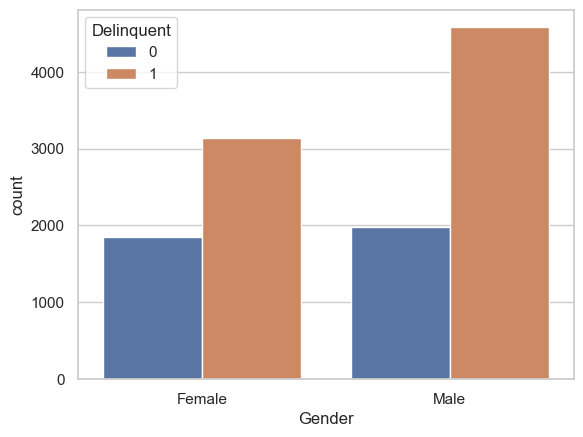

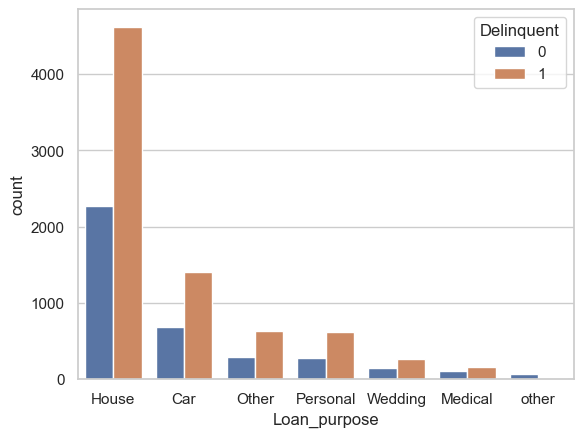

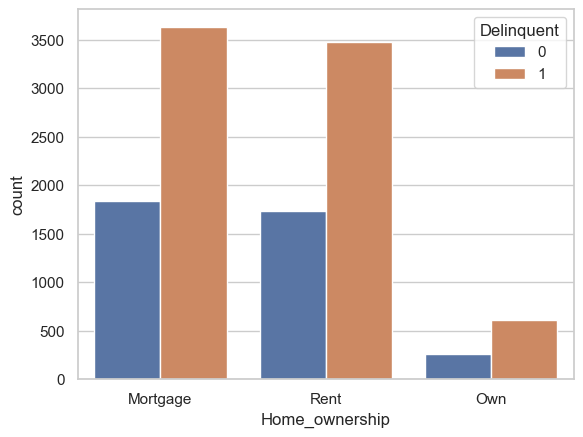

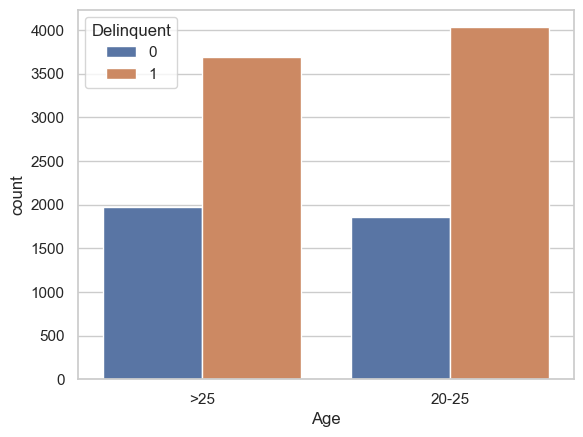

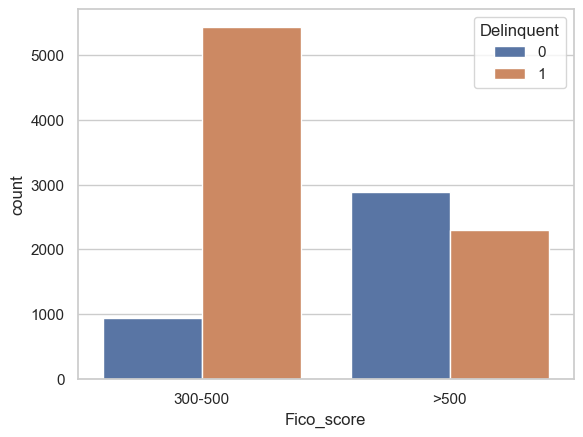

In [16]:
# Checking how the features are distributed

for cols in df.drop('Delinquent', axis = 1).columns:
    sns.countplot(data=df, x = cols, hue='Delinquent')
    plt.show()

Key observations:

Mostly the age category of 20-25 seem to have caused delinquency

Brorowers with low FICO score of 300-500 are more likely to have caused loan delinquency

# Data Preprocessing

## Handling missing values

In [17]:
# Checking what percent of values are missing in each feature.

pd.DataFrame(df.isnull().sum()/len(df)*100, columns=['Missing Value %'], index = df.columns)

,Missing Value %
Delinquent,0.0
Loan_term,0.0
Gender,0.0
Loan_purpose,0.0
Home_ownership,0.0
Age,0.0
Fico_score,0.0


There are no missing values in the data

In [18]:
# Checking the datatypes of the features, in order to convert the same into numeric

pd.DataFrame(df.dtypes, columns= ['Data Type'], index = df.columns)

,Data Type
Delinquent,int64
Loan_term,object
Gender,object
Loan_purpose,object
Home_ownership,object
Age,object
Fico_score,object


## Label Encoding

In [19]:
# Converting the loan terms given in string format into numeric as shown:

df['Loan_term'] = df['Loan_term'].replace({'36 months':0, '60 months':1})

In [20]:
# Converting the Gender given in string format into numeric as shown:

df['Gender'] = df['Gender'].replace({'Female':0, 'Male':1})

In [21]:
# Converting the Age given in string format into numeric as shown:

df['Age'] = df['Age'].replace({'20-25':0, '>25':1})

In [22]:
# Converting the Fico_score given in string format into numeric as shown:

df['Fico_score'] = df['Fico_score'].replace({'300-500':0, '>500':1})

## One Hot Encoding

In [23]:
df['Loan_purpose'] = df['Loan_purpose'].replace({'other':'Other'})

In [24]:
df = pd.get_dummies(data=df,columns=['Loan_purpose', 'Home_ownership'], drop_first=True,dtype='int64')

In [25]:
df.head()

,Delinquent,Loan_term,Gender,Age,Fico_score,Loan_purpose_House,Loan_purpose_Medical,Loan_purpose_Other,Loan_purpose_Personal,Loan_purpose_Wedding,Home_ownership_Own,Home_ownership_Rent
0,1,0,0,1,0,1,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,0,1
2,1,0,0,1,0,1,0,0,0,0,0,1
3,1,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,1,0,1,0,0,0,0,0,1


In [26]:
# Confirming the datatypes of all the features after label encoding and one hot encoding

pd.DataFrame(df.dtypes, columns= ['Data Type'], index = df.columns)

,Data Type
Delinquent,int64
Loan_term,int64
Gender,int64
Age,int64
Fico_score,int64
Loan_purpose_House,int64
Loan_purpose_Medical,int64
Loan_purpose_Other,int64
Loan_purpose_Personal,int64
Loan_purpose_Wedding,int64


## Handling Outliers

Here since all the values are categorical, there is no need of handling outliers

## Feature Scaling

Feature scaling is not required as all the values are in the range of 0 and 1

# Splitting the data into independent and dependent variables

In [27]:
x = df.drop('Delinquent', axis=1)
y = df['Delinquent']

In [28]:
y.value_counts()

Delinquent
1    7721
0    3827
Name: count, dtype: int64

# Imbalance Treatment of the Output variable

In [29]:
import imblearn

In [30]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_bal, y_bal = ros.fit_resample(x,y)

In [31]:
y_bal.value_counts()

Delinquent
1    7721
0    7721
Name: count, dtype: int64

In [32]:
# Splitting the data into train and test

from sklearn.model_selection import train_test_split, cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size=0.25, random_state=42)

In [33]:
x_train.head()

,Loan_term,Gender,Age,Fico_score,Loan_purpose_House,Loan_purpose_Medical,Loan_purpose_Other,Loan_purpose_Personal,Loan_purpose_Wedding,Home_ownership_Own,Home_ownership_Rent
9647,0,0,1,1,1,0,0,0,0,0,1
14355,0,0,0,1,0,0,1,0,0,0,0
819,0,1,1,1,0,1,0,0,0,0,1
14558,0,0,1,1,0,0,0,1,0,0,0
13802,0,0,0,1,1,0,0,0,0,0,0


In [34]:
# importing necessary models from sklearn for model building:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

# Importing performance metrics
from sklearn.metrics import classification_report, confusion_matrix, recall_score, accuracy_score

In [35]:
# Building Binary classification Logistic regression model.

logit = LogisticRegression()
logit.fit(x_train, y_train)
pred_train_logit = logit.predict(x_train)
pred_test_logit = logit.predict(x_test)

In [36]:
# Model Performance:

print('The classification report and confusion matrix for the Logistic Regression model is: ')
print('\n')
print('\n')
print('The classification report and confusion matrix for Train data:')
print('\n')
print(classification_report(y_train, pred_train_logit))
print('--'*50)
print(confusion_matrix(y_train, pred_train_logit))
print('--'*50)
print('The accuracy score for train data:', accuracy_score(y_train, pred_train_logit))
print('--'*50)
print('The recall score for train data:', recall_score(y_train, pred_train_logit))
print('\n')

print('The classification report and confusion matrix for Test data:')
print('\n')
print(classification_report(y_test, pred_test_logit))
print('--'*50)
print(confusion_matrix(y_test, pred_test_logit))
print('--'*50)
print('The accuracy score for test data:', accuracy_score(y_test, pred_test_logit))
print('--'*50)
print('The recall score for test data:', recall_score(y_test, pred_test_logit))

The classification report and confusion matrix for the Logistic Regression model is: 




The classification report and confusion matrix for Train data:


              precision    recall  f1-score   support

           0       0.76      0.82      0.79      5805
           1       0.81      0.74      0.77      5776

    accuracy                           0.78     11581
   macro avg       0.78      0.78      0.78     11581
weighted avg       0.78      0.78      0.78     11581

----------------------------------------------------------------------------------------------------
[[4781 1024]
 [1521 4255]]
----------------------------------------------------------------------------------------------------
The accuracy score for train data: 0.7802435022882307
----------------------------------------------------------------------------------------------------
The recall score for train data: 0.7366689750692521


The classification report and confusion matrix for Test data:


              pr

In [37]:
accuracy_scrore_train = cross_val_score(estimator=logit, X=x_train, y=y_train, cv=10, scoring='accuracy')
accuracy_scrore_test = cross_val_score(estimator=logit, X=x_test, y=y_test, cv=10, scoring='accuracy')
print('Mean train corss validation score:', np.mean(accuracy_scrore_train))
print('Mean test corss validation score:', np.mean(accuracy_scrore_test))

Mean train corss validation score: 0.7796374696190063
Mean test corss validation score: 0.7759683228233657


In [38]:
# Building Decision Tree classification model.

dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
pred_train_dtree = dtree.predict(x_train)
pred_test_dtree = dtree.predict(x_test)

In [39]:
# Model Performance:

print('The classification report and confusion matrix for the Decision Tree classification model is: ')
print('\n')
print('\n')
print('The classification report and confusion matrix for Train data:')
print('\n')
print(classification_report(y_train, pred_train_dtree))
print('--'*50)
print(confusion_matrix(y_train, pred_train_dtree))
print('--'*50)
print('The accuracy score for train data:', accuracy_score(y_train, pred_train_dtree))
print('--'*50)
print('The recall score for train data:', recall_score(y_train, pred_train_dtree))
print('\n')

print('The classification report and confusion matrix for Test data:')
print('\n')
print(classification_report(y_test, pred_test_dtree))
print('--'*50)
print(confusion_matrix(y_test, pred_test_dtree))
print('--'*50)
print('The accuracy score for test data:', accuracy_score(y_test, pred_test_dtree))
print('--'*50)
print('The recall score for test data:', recall_score(y_test, pred_test_dtree))

The classification report and confusion matrix for the Decision Tree classification model is: 




The classification report and confusion matrix for Train data:


              precision    recall  f1-score   support

           0       0.88      0.75      0.81      5805
           1       0.78      0.90      0.84      5776

    accuracy                           0.83     11581
   macro avg       0.83      0.83      0.82     11581
weighted avg       0.83      0.83      0.82     11581

----------------------------------------------------------------------------------------------------
[[4353 1452]
 [ 570 5206]]
----------------------------------------------------------------------------------------------------
The accuracy score for train data: 0.8254036784388222
----------------------------------------------------------------------------------------------------
The recall score for train data: 0.9013157894736842


The classification report and confusion matrix for Test data:


       

It is observed that decision tree model is performing better than logistic regression model.

In [40]:
accuracy_scrore_train = cross_val_score(estimator=dtree, X=x_train, y=y_train, cv=10, scoring='accuracy')
accuracy_scrore_test = cross_val_score(estimator=dtree, X=x_test, y=y_test, cv=10, scoring='accuracy')
print('Mean train corss validation score:', np.mean(accuracy_scrore_train))
print('Mean test corss validation score:', np.mean(accuracy_scrore_test))

Mean train corss validation score: 0.8232431924966583
Mean test corss validation score: 0.8192151664859221


In [41]:
# Building Random Forest classifier model.

rfc = RandomForestClassifier(n_estimators=180, criterion='entropy', n_jobs=-1, )
rfc.fit(x_train, y_train)
pred_train_rfc = rfc.predict(x_train)
pred_test_rfc = rfc.predict(x_test)

In [42]:
# Model Performance:

print('The classification report and confusion matrix for the Random Forest classifier model is: ')
print('\n')
print('\n')
print('The classification report and confusion matrix for Train data:')
print('\n')
print(classification_report(y_train, pred_train_rfc))
print('--'*50)
print(confusion_matrix(y_train, pred_train_rfc))
print('--'*50)
print('The accuracy score for train data:', accuracy_score(y_train, pred_train_rfc))
print('--'*50)
print('The recall score for train data:', recall_score(y_train, pred_train_rfc))
print('\n')

print('The classification report and confusion matrix for Test data:')
print('\n')
print(classification_report(y_test, pred_test_rfc))
print('--'*50)
print(confusion_matrix(y_test, pred_test_rfc))
print('--'*50)
print('The accuracy score for test data:', accuracy_score(y_test, pred_test_rfc))
print('--'*50)
print('The recall score for test data:', recall_score(y_test, pred_test_rfc))

The classification report and confusion matrix for the Random Forest classifier model is: 




The classification report and confusion matrix for Train data:


              precision    recall  f1-score   support

           0       0.89      0.75      0.81      5805
           1       0.78      0.90      0.84      5776

    accuracy                           0.83     11581
   macro avg       0.83      0.83      0.82     11581
weighted avg       0.83      0.83      0.82     11581

----------------------------------------------------------------------------------------------------
[[4342 1463]
 [ 559 5217]]
----------------------------------------------------------------------------------------------------
The accuracy score for train data: 0.8254036784388222
----------------------------------------------------------------------------------------------------
The recall score for train data: 0.9032202216066482


The classification report and confusion matrix for Test data:


           

In [43]:
accuracy_scrore_train = cross_val_score(estimator=rfc, X=x_train, y=y_train, cv=10, scoring='accuracy')
accuracy_scrore_test = cross_val_score(estimator=rfc, X=x_test, y=y_test, cv=10, scoring='accuracy')
print('Mean train corss validation score:', np.mean(accuracy_scrore_train))
print('Mean test corss validation score:', np.mean(accuracy_scrore_test))

Mean train corss validation score: 0.8233293992647465
Mean test corss validation score: 0.8184386338380796


In [44]:
# Building Bagging classifier model.

bgc = BaggingClassifier()
bgc.fit(x_train, y_train)
pred_train_bgc = bgc.predict(x_train)
pred_test_bgc = bgc.predict(x_test)

In [45]:
# Model Performance:

print('The classification report and confusion matrix for the Bagging classifier model is: ')
print('\n')
print('\n')
print('The classification report and confusion matrix for Train data:')
print('\n')
print(classification_report(y_train, pred_train_bgc))
print('--'*50)
print(confusion_matrix(y_train, pred_train_bgc))
print('--'*50)
print('The accuracy score for train data:', accuracy_score(y_train, pred_train_bgc))
print('--'*50)
print('The recall score for train data:', recall_score(y_train, pred_train_bgc))
print('\n')

print('The classification report and confusion matrix for Test data:')
print('\n')
print(classification_report(y_test, pred_test_bgc))
print('--'*50)
print(confusion_matrix(y_test, pred_test_bgc))
print('--'*50)
print('The accuracy score for test data:', accuracy_score(y_test, pred_test_bgc))
print('--'*50)
print('The recall score for test data:', recall_score(y_test, pred_test_bgc))

The classification report and confusion matrix for the Bagging classifier model is: 




The classification report and confusion matrix for Train data:


              precision    recall  f1-score   support

           0       0.88      0.75      0.81      5805
           1       0.78      0.90      0.84      5776

    accuracy                           0.83     11581
   macro avg       0.83      0.83      0.82     11581
weighted avg       0.83      0.83      0.82     11581

----------------------------------------------------------------------------------------------------
[[4352 1453]
 [ 570 5206]]
----------------------------------------------------------------------------------------------------
The accuracy score for train data: 0.8253173301096624
----------------------------------------------------------------------------------------------------
The recall score for train data: 0.9013157894736842


The classification report and confusion matrix for Test data:


              pre

In [46]:
accuracy_scrore_train = cross_val_score(estimator=bgc, X=x_train, y=y_train, cv=10, scoring='accuracy')
accuracy_scrore_test = cross_val_score(estimator=bgc, X=x_test, y=y_test, cv=10, scoring='accuracy')
print('Mean train corss validation score:', np.mean(accuracy_scrore_train))
print('Mean test corss validation score:', np.mean(accuracy_scrore_test))

Mean train corss validation score: 0.8230703319072334
Mean test corss validation score: 0.8192151664859221


In [47]:
# Building Xtreme Gradient Boosting classifier model.

xgbc = XGBClassifier()
xgbc.fit(x_train, y_train)
pred_train_xgbc = xgbc.predict(x_train)
pred_test_xgbc = xgbc.predict(x_test)

In [48]:
# Model Performance:

print('The classification report and confusion matrix for the Xtreme Gradient Boosting classifier model is: ')
print('\n')
print('\n')
print('The classification report and confusion matrix for Train data:')
print('\n')
print(classification_report(y_train, pred_train_xgbc))
print('--'*50)
print(confusion_matrix(y_train, pred_train_xgbc))
print('--'*50)
print('The accuracy score for train data:', accuracy_score(y_train, pred_train_xgbc))
print('--'*50)
print('The recall score for train data:', recall_score(y_train, pred_train_xgbc))
print('\n')

print('The classification report and confusion matrix for Test data:')
print('\n')
print(classification_report(y_test, pred_test_xgbc))
print('--'*50)
print(confusion_matrix(y_test, pred_test_xgbc))
print('--'*50)
print('The accuracy score for test data:', accuracy_score(y_test, pred_test_xgbc))
print('--'*50)
print('The recall score for test data:', recall_score(y_test, pred_test_xgbc))

The classification report and confusion matrix for the Xtreme Gradient Boosting classifier model is: 




The classification report and confusion matrix for Train data:


              precision    recall  f1-score   support

           0       0.88      0.75      0.81      5805
           1       0.78      0.90      0.84      5776

    accuracy                           0.83     11581
   macro avg       0.83      0.83      0.82     11581
weighted avg       0.83      0.83      0.82     11581

----------------------------------------------------------------------------------------------------
[[4349 1456]
 [ 567 5209]]
----------------------------------------------------------------------------------------------------
The accuracy score for train data: 0.8253173301096624
----------------------------------------------------------------------------------------------------
The recall score for train data: 0.9018351800554016


The classification report and confusion matrix for Test data:




In [49]:
accuracy_scrore_train = cross_val_score(estimator=xgbc, X=x_train, y=y_train, cv=10, scoring='accuracy')
accuracy_scrore_test = cross_val_score(estimator=xgbc, X=x_test, y=y_test, cv=10, scoring='accuracy')
print('Mean train corss validation score:', np.mean(accuracy_scrore_train))
print('Mean test corss validation score:', np.mean(accuracy_scrore_test))

Mean train corss validation score: 0.8232429689700341
Mean test corss validation score: 0.8197339706256443


Among all the models Random Forest classifier is giving the better results.

In [50]:
# Checking performance of the model using ROC-AUC Curve

In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [52]:
rfc_roc_under_auc = roc_auc_score(y_test,pred_test_rfc)

In [53]:
rfc_roc_under_auc

0.8200027102307185

In [54]:
fpr, tpr, thres = roc_curve(y_test, pred_test_rfc)
display(fpr[:10])
display(tpr[:10])
display(thres[:10])

array([0.        , 0.24791232, 1.        ])

array([0.        , 0.88791774, 1.        ])

array([inf,  1.,  0.])

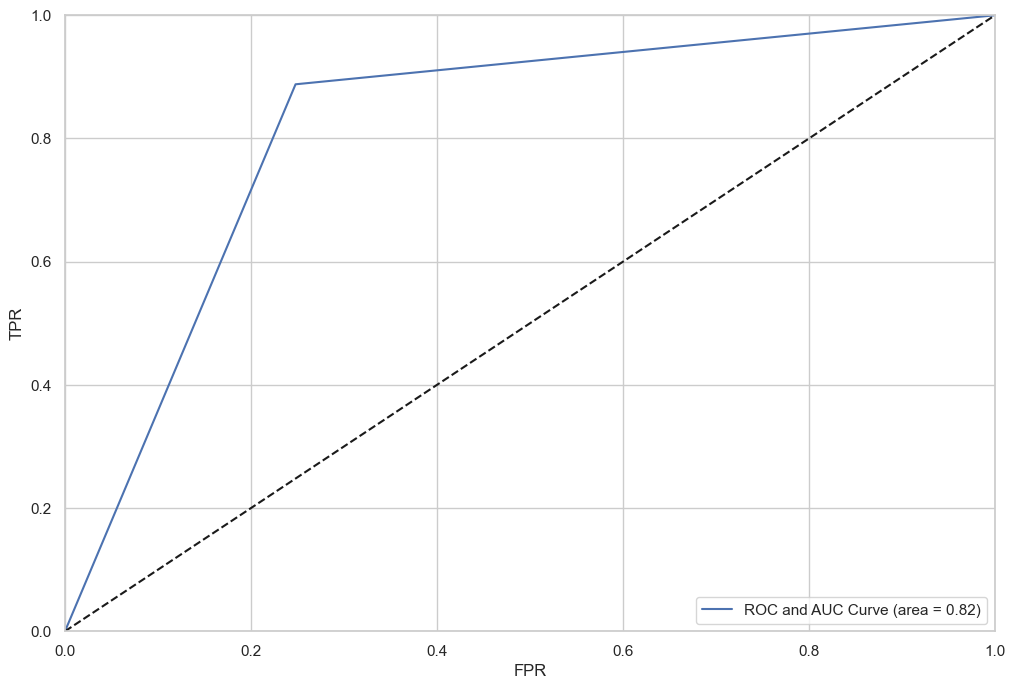

In [55]:
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label = 'ROC and AUC Curve (area = %0.2f)' % rfc_roc_under_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.legend(loc='lower right')
plt.show()

## Concluding: Since the model is showing great performance in the ROC-AUC Curve, the model using Random Forest with Train accuracy of 83% and Test accuracy of 82% and 10 Fold Cross Validation mean Accuracy scores for training and test data is 82% and 81% respectively, Hence the model can be said to be performing very well and can be used for deployment in production.

## Note: In this dataset, the False Negative value should be as low as possible as we would not want to classify a person as non delinquent if they are actually delinquent.

In [56]:
x_train.head()

,Loan_term,Gender,Age,Fico_score,Loan_purpose_House,Loan_purpose_Medical,Loan_purpose_Other,Loan_purpose_Personal,Loan_purpose_Wedding,Home_ownership_Own,Home_ownership_Rent
9647,0,0,1,1,1,0,0,0,0,0,1
14355,0,0,0,1,0,0,1,0,0,0,0
819,0,1,1,1,0,1,0,0,0,0,1
14558,0,0,1,1,0,0,0,1,0,0,0
13802,0,0,0,1,1,0,0,0,0,0,0


In [57]:
# Model Predictions using random feature values:

def pred_delinquent(Loan_term, Gender, Age, Fico_score, Loan_purpose_House, Loan_purpose_Medical, Loan_purpose_Other, 
                    Loan_purpose_Personal, Loan_purpose_Wedding, Home_ownership_Own, Home_ownership_Rent):
    prediction = rfc.predict([[Loan_term, Gender, Age, Fico_score, Loan_purpose_House, Loan_purpose_Medical, Loan_purpose_Other, 
                    Loan_purpose_Personal, Loan_purpose_Wedding, Home_ownership_Own, Home_ownership_Rent]])
    if prediction == [1]:
        print('\n')
        return 'Caution!!! The likelihood of the borrower being delinquent is very high.'
    else:
        print('\n')
        return 'The likelihood of the borrower being delinquent is negligibly low.'

0 0 1 0 1 0 0 0 0 0 1

In [58]:
# Model taking input from user:

Loan_term = int(input("Enter the Loan term 1 if 60 months and 0 if 36 months: "))
Gender = int(input("Enter the gender of the borrower 1 if male and 0 if female: "))
Age = int(input("Enter the age of the borrower 1 if > 25 years of age and 0 if age ranges from 20-25: "))
Fico_score = int(input("Enter the Fico score of the borrower 1 if > 500 0 if between 300-500: "))
Loan_purpose_House = int(input("Enter 1 if the purpose of loan is for house: "))
Loan_purpose_Medical = int(input("Enter 1 if the purpose of loan is for medical: "))
Loan_purpose_Other = int(input("Enter 1 if the purpose of loan is for other: "))
Loan_purpose_Personal = int(input("Enter 1 if the purpose of loan is for Personal: "))
Loan_purpose_Wedding = int(input("Enter 1 if the purpose of loan is for Wedding: "))
Home_ownership_Own = int(input("Enter 1 if the borrower owns his current residence: "))
Home_ownership_Rent = int(input("Enter 1 if the borrower rents his current residence: "))


print(pred_delinquent(Loan_term, Gender, Age, Fico_score, Loan_purpose_House, Loan_purpose_Medical, Loan_purpose_Other, 
                    Loan_purpose_Personal, Loan_purpose_Wedding, Home_ownership_Own, Home_ownership_Rent))

Enter the Loan term 1 if 60 months and 0 if 36 months: 0
Enter the gender of the borrower 1 if male and 0 if female: 0
Enter the age of the borrower 1 if > 25 years of age and 0 if age ranges from 20-25: 1
Enter the Fico score of the borrower 1 if > 500 0 if between 300-500: 0
Enter 1 if the purpose of loan is for house: 1
Enter 1 if the purpose of loan is for medical: 0
Enter 1 if the purpose of loan is for other: 0
Enter 1 if the purpose of loan is for Personal: 0
Enter 1 if the purpose of loan is for Wedding: 0
Enter 1 if the borrower owns his current residence: 0
Enter 1 if the borrower rents his current residence: 1


Caution!!! The likelihood of the borrower being delinquent is very high.


0 0 0 1 0 0 0 1 0 0 0 

In [59]:
# Model taking input from user:

Loan_term = int(input("Enter the Loan term 1 if 60 months and 0 if 36 months: "))
Gender = int(input("Enter the gender of the borrower 1 if male and 0 if female: "))
Age = int(input("Enter the age of the borrower 1 if > 25 years of age and 0 if age ranges from 20-25: "))
Fico_score = int(input("Enter the Fico score of the borrower 1 if > 500 0 if between 300-500: "))
Loan_purpose_House = int(input("Enter 1 if the purpose of loan is for house: "))
Loan_purpose_Medical = int(input("Enter 1 if the purpose of loan is for medical: "))
Loan_purpose_Other = int(input("Enter 1 if the purpose of loan is for other: "))
Loan_purpose_Personal = int(input("Enter 1 if the purpose of loan is for Personal: "))
Loan_purpose_Wedding = int(input("Enter 1 if the purpose of loan is for Wedding: "))
Home_ownership_Own = int(input("Enter 1 if the borrower owns his current residence: "))
Home_ownership_Rent = int(input("Enter 1 if the borrower rents his current residence: "))


print(pred_delinquent(Loan_term, Gender, Age, Fico_score, Loan_purpose_House, Loan_purpose_Medical, Loan_purpose_Other, 
                    Loan_purpose_Personal, Loan_purpose_Wedding, Home_ownership_Own, Home_ownership_Rent))

Enter the Loan term 1 if 60 months and 0 if 36 months: 0
Enter the gender of the borrower 1 if male and 0 if female: 0
Enter the age of the borrower 1 if > 25 years of age and 0 if age ranges from 20-25: 0
Enter the Fico score of the borrower 1 if > 500 0 if between 300-500: 1
Enter 1 if the purpose of loan is for house: 0
Enter 1 if the purpose of loan is for medical: 0
Enter 1 if the purpose of loan is for other: 0
Enter 1 if the purpose of loan is for Personal: 1
Enter 1 if the purpose of loan is for Wedding: 0
Enter 1 if the borrower owns his current residence: 0
Enter 1 if the borrower rents his current residence: 0


The likelihood of the borrower being delinquent is negligibly low.
